# Sistema de classificação de motoristas - Utilizando Fuzzy

Esse sistema tem como propósito apartir da avaliação do atendimento e da rota que um motorista de táxi por parte de seu passageiro seja possível gerar sua avaliação em estrelas.
A avaliação do atendimento e da rota é dada em um intervalo de 0 a 10 sendo, 10 a melhor nota e as estrelas em um intervalo de 0 a 5, sendo 5 a melhor avaliação.

## **O sistema consistem em:**

* Antecedentes:

    > **route** - Rota utilizada pelo motorista. 
    >> Avaliada em um intervalo de 0 a 10; 

    >> Fuzzy: bad, average, great.
    
    > **attendance** - Atendimento do motorista para com o passageiro.  
    >> Avaliada em um intervalo de 0 a 10;

    >> Fuzzy: bad, average, great.
* Consequente:
    > **star** - Avaliação do motorista em Estrelas. 
    >> Avaliada em um intervalo de 0 a 5;
    
    >> Fuzzy: low, median, high
    
---


* Regras:

  * Se a Rota é boa e Atendimento medio, então Avaliação vai ser média;
  * Se o Atendimento for ruim ou a Rota for ruim, então Avaliação vai ser ruim;
  * Se Rota for média e Atendimento médio, então Avaliação vai ser média
  * Se Rota for boa e Atendimento bom, Avaliação vai ser alta.



In [61]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [63]:
# antecedentes
route = ctrl.Antecedent(np.arange(0, 11, 1), 'route')
attendance = ctrl.Antecedent(np.arange(0, 11, 1), 'attendance')

#Consequente
star = ctrl.Consequent(np.arange(0, 6, 1), 'star')

# Classificação dos antecedentes
route.automf(3, names=['bad', 'average', 'great'])
attendance.automf(3, names=['bad', 'average', 'great'])

# Intervalo de classificação do consequente
star['low'] = fuzz.trimf(star.universe, [0, 0, 2])
star['medium'] = fuzz.trimf(star.universe, [0, 2, 4])
star['high'] = fuzz.trimf(star.universe, [3, 5, 5])

Vizualização

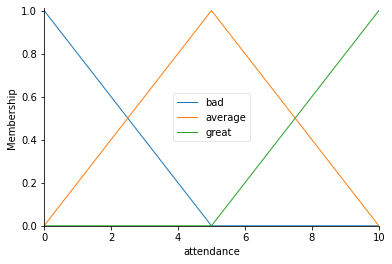

In [64]:
attendance.view()

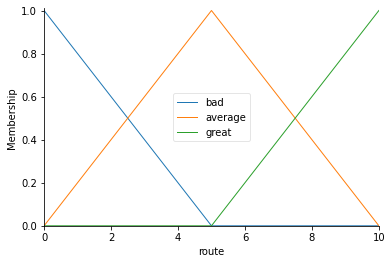

In [65]:
route.view()

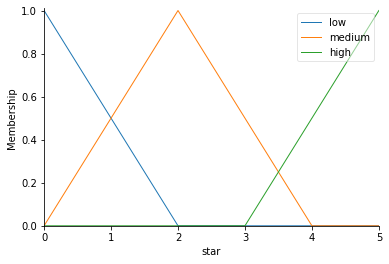

In [66]:
star.view()

## Regras

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c24d991d0>)

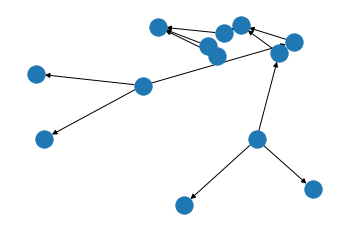

In [67]:
rule1 = ctrl.Rule(route['great'] & attendance['average'], star['medium'])
rule2 = ctrl.Rule(attendance['bad'] | route['bad'], star['low'])
rule3 = ctrl.Rule(route['average'] & attendance['average'], star['medium'])
rule4 = ctrl.Rule(route['great'] & attendance['great'], star['high'])

rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c24d1b990>)

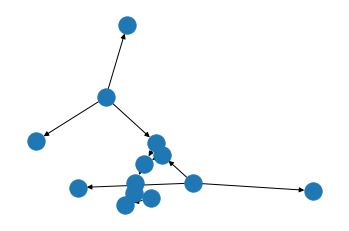

In [68]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c24c61710>)

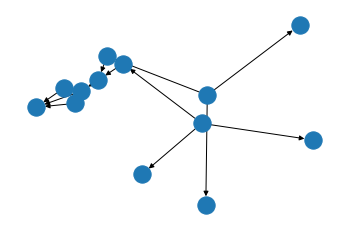

In [69]:
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c244d8410>)

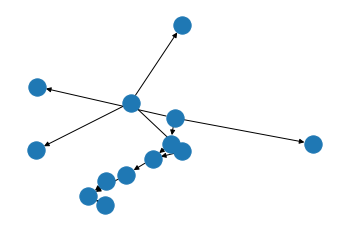

In [70]:
rule4.view()

## Sitema de controle

In [71]:
# Criando sistema de controle

stars_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
stars = ctrl.ControlSystemSimulation(stars_ctrl)

Inserindo valores de entrada:
* Atendimento = 8.5
* Rota = 7.8

In [72]:
stars.input['attendance'] = 8.5
stars.input['route'] = 7.8

stars.compute()

Resultado: 3

2.963076923076923


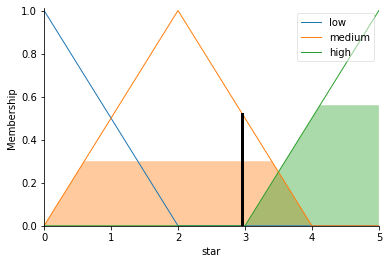

In [73]:
print(stars.output['star'])
star.view(sim=stars)